Initial Data Preview
   Area_sqft  Bedrooms  Bathrooms  YearBuilt         Location  Price_USD
0       2248         4          3       2011  Urban Outskirts     432736
1       1930         5          1       1957         Suburban     395316
2       2323         2          1       1992         DownTown     226244
3       2761         5          3       1969         Suburban     419350
4       1882         4          4       1988            Rural     256869
data Splitting and Preprocessing Setup complete
Tarining data shape:(800, 5)
Testing data shape:(200, 5)
Training the Linear Regression Model
Model training complete.
Model Performance:0.58
this R-squared value indicates how well our model explains the variance in house prices.
Predicting price for an unknown house
Unknown house features:
    Area_sqft  Bedrooms  Bathrooms  YearBuilt  Location
0       2500         4          3       2025  Downtown

Predicted price for the unknown house:$387,664.60
Generating visualizations


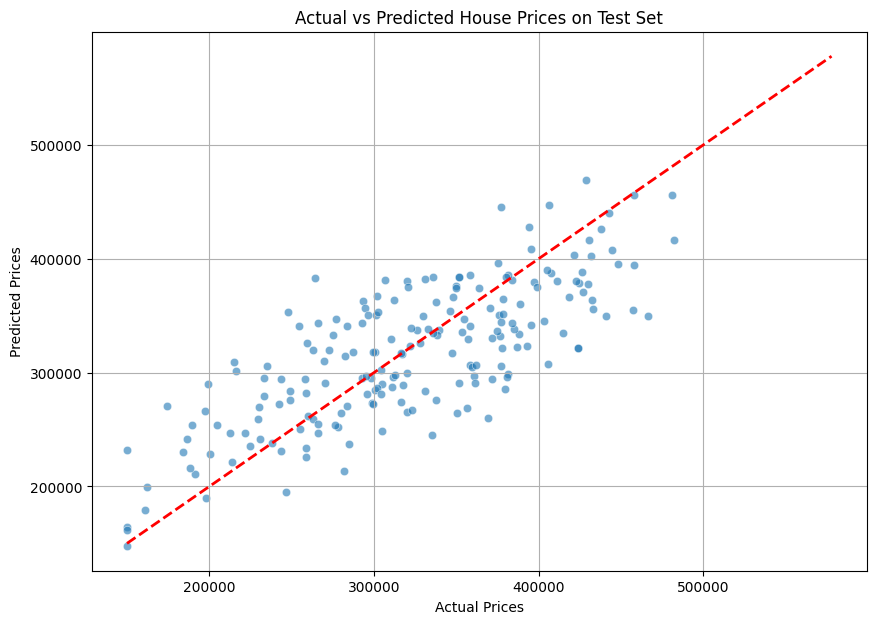

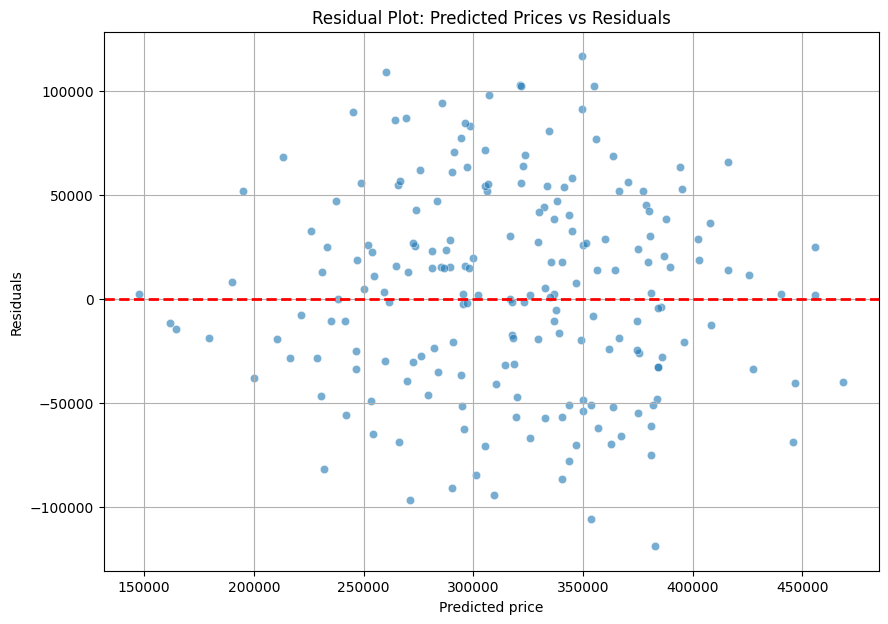


Visualizations generated successfully.


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

num_samples=1000

#Dataset Generation
area=np.random.normal(loc=2000, scale=500, size=num_samples).astype(int)
area=np.clip(area,800,4000)

bedrooms= np.random.randint(2,6,size=num_samples)

bathrooms=np.random.randint(1,5,size=num_samples)

year_built=np.random.randint(1950,2025,size=num_samples)

locations=['DownTown','Suburban','Rural','Urban Outskirts']
location=np.random.choice(locations,size=num_samples, p=[0.3,0.4,0.1,0.2])

price=(
    50*area+30000*bedrooms+20000*bathrooms+1000*(year_built-1950)+np.random.normal(loc=0, scale=50000,size=num_samples)
)

price[location=='Downtown'] +=100000
price[location=='Suburban']+=50000
price[location=='Rural']-=30000
price[location=='Urban Outskirts'] +=20000

price=np.maximum(price,150000).astype(int)

data=pd.DataFrame({
    'Area_sqft': area,
    'Bedrooms': bedrooms,
    'Bathrooms': bathrooms,
    'YearBuilt': year_built,
    'Location': location,
    'Price_USD': price
})

print("Initial Data Preview")
print(data.head())

#Data preprocessing and Splitting
X=data[['Area_sqft','Bedrooms','Bathrooms','YearBuilt','Location']]
y=data['Price_USD']

categorical_features=['Location']
numerical_features=['Area_sqft','Bedrooms','Bathrooms','YearBuilt']

preprocessor=ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),categorical_features)],
    remainder='passthrough'
)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print("data Splitting and Preprocessing Setup complete")
print(f"Tarining data shape:{X_train.shape}")
print(f"Testing data shape:{X_test.shape}")

#Build and train the linear regression model
model_pipeline=Pipeline(steps=[('preprocessor',preprocessor),('regressor',LinearRegression())])

print("Training the Linear Regression Model")
model_pipeline.fit(X_train,y_train)
print("Model training complete.")

#Evaluate Model Performance
y_pred = model_pipeline.predict(X_test)

r2=r2_score(y_test,y_pred)
print(f"Model Performance:{r2:.2f}")
print("this R-squared value indicates how well our model explains the variance in house prices.")

#Predict an unknown house price
unknown_house_features= pd.DataFrame([{
    'Area_sqft':2500,
    'Bedrooms':4,
    'Bathrooms':3,
    'YearBuilt':2025,
    'Location':'Downtown'
}])

print("Predicting price for an unknown house")
print("Unknown house features:\n",unknown_house_features)

predicted_price=model_pipeline.predict(unknown_house_features)
print(f"\nPredicted price for the unknown house:${predicted_price[0]:,.2f}")

#Visualize Results
print("Generating visualizations")

plt.figure(figsize=(10,7))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y.min(),y.max()],[y.min(),y.max()],'r--',lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices on Test Set")
plt.grid(True)
plt.show()

residuals=y_test-y_pred
plt.figure(figsize=(10,7))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0,color='r',linestyle='--',lw=2)
plt.xlabel("Predicted price")
plt.ylabel("Residuals")
plt.title("Residual Plot: Predicted Prices vs Residuals")
plt.grid(True)
plt.show()

print("\nVisualizations generated successfully.")